### SMS spam detection
### naive bayes 

In [2]:
import pandas as pd 
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report
 

In [3]:
df=pd.read_csv("spam.csv", encoding="ISO-8859-1")#[['v1','v2']]


In [4]:
df.columns

Index(['v1', 'v2', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], dtype='object')

In [5]:
df=pd.read_csv("spam.csv", encoding="ISO-8859-1")[['v1','v2']]

In [6]:
df.columns

Index(['v1', 'v2'], dtype='object')

In [7]:
df.columns = ['label','text']


In [8]:
df.label

0        ham
1        ham
2       spam
3        ham
4        ham
        ... 
5567    spam
5568     ham
5569     ham
5570     ham
5571     ham
Name: label, Length: 5572, dtype: object

In [9]:
df.label.value_counts()

label
ham     4825
spam     747
Name: count, dtype: int64

In [10]:
df['label']=df['label'].map({'ham':0,'spam':1})

In [11]:
X_train,X_test,y_train,y_test = train_test_split(df['text'],df['label'],test_size=0.2,random_state=42) 
vectorizer=CountVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)




In [12]:
print(X_test_vec)

<Compressed Sparse Row sparse matrix of dtype 'int64'
	with 13941 stored elements and shape (1115, 7735)>
  Coords	Values
  (0, 1808)	1
  (0, 2759)	1
  (0, 3067)	1
  (0, 3337)	1
  (0, 3567)	1
  (0, 3873)	1
  (0, 4685)	1
  (0, 4773)	1
  (0, 4776)	1
  (0, 7040)	1
  (0, 7482)	1
  (1, 923)	1
  (1, 955)	1
  (1, 1036)	1
  (1, 1987)	1
  (1, 2023)	1
  (1, 2375)	2
  (1, 2731)	1
  (1, 2836)	1
  (1, 2954)	1
  (1, 3298)	1
  (1, 3415)	1
  (1, 3600)	1
  (1, 3739)	1
  (1, 3837)	1
  :	:
  (1111, 7152)	1
  (1111, 7386)	1
  (1111, 7425)	1
  (1112, 3361)	1
  (1112, 4495)	1
  (1112, 4614)	1
  (1112, 6251)	2
  (1112, 6763)	1
  (1112, 6781)	1
  (1112, 7475)	1
  (1112, 7662)	1
  (1112, 7679)	1
  (1113, 2422)	1
  (1113, 3129)	1
  (1113, 3416)	1
  (1113, 6786)	1
  (1114, 305)	1
  (1114, 1292)	1
  (1114, 1353)	1
  (1114, 1454)	1
  (1114, 3361)	1
  (1114, 4235)	1
  (1114, 4723)	1
  (1114, 5247)	1
  (1114, 7679)	1


In [13]:


clf = MultinomialNB()
clf.fit(X_train_vec,y_train)
y_pred = clf.predict(X_test_vec)
print("Accuracy:", accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))
print("Recall:",recall_score(y_test,y_pred))
print(classification_report(y_test,y_pred))


Accuracy: 0.9838565022421525
Precision 0.9852941176470589
Recall: 0.8933333333333333
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       965
           1       0.99      0.89      0.94       150

    accuracy                           0.98      1115
   macro avg       0.98      0.95      0.96      1115
weighted avg       0.98      0.98      0.98      1115



Text(50.722222222222214, 0.5, 'Actual')

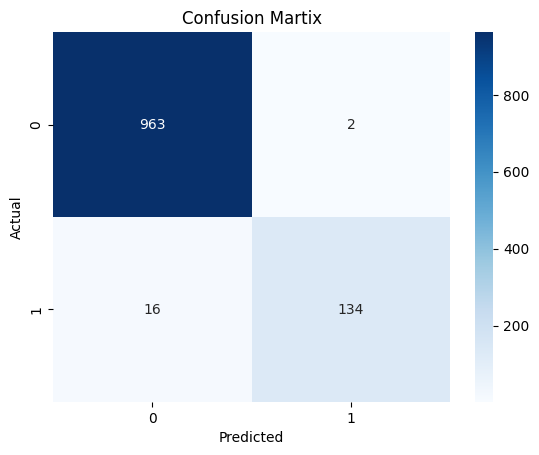

In [14]:
import seaborn as sns 
import matplotlib.pyplot as plt
corr=sns.heatmap(pd.crosstab(y_test,y_pred),annot=True,fmt='d',cmap='Blues')
plt.title('Confusion Martix')
plt.xlabel('Predicted')
plt.ylabel("Actual")

In [15]:
print("Accuracy_score", accuracy_score(y_test,y_pred)*100)

Accuracy_score 98.38565022421525
